<a href="https://colab.research.google.com/github/lovishkanther11/Deep-Learning/blob/master/SimpleKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras package in Python

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU.
Read the documentation at Keras.io.

Keras is compatible with: Python 2.7-3.6.

The core data structure of Keras is a **model**, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

In [0]:
#Here is the Sequential model:

from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [0]:
#Stacking layers is as easy as .add():

from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=1, activation='softmax'))

# Compilation

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. 


A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. 

A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function. 


In [0]:
#Once your model looks good, configure its learning process with .compile():

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. There are several possible ways to do this:

Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In input_shape, the batch dimension is not included.

Some 2D layers, such as Dense, support the specification of their input shape via the argument input_dim, and some 3D temporal layers support the arguments input_dim and input_length.


In [0]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

In [0]:
# Check the shape of inputs
data.shape

(1000, 100)

In [0]:
# Check the shape of labels
labels.shape

(1000, 1)

# Training

Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function. 

In [0]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)




Epoch 1/10





1000/1000 [==============================] - 10s 10ms/step - loss: 8.3060 - acc: 0.4790
Epoch 2/10
1000/1000 [==============================] - 0s 96us/step - loss: 8.3060 - acc: 0.4790
Epoch 3/10
1000/1000 [==============================] - 0s 93us/step - loss: 8.3060 - acc: 0.4790
Epoch 4/10
1000/1000 [==============================] - 0s 102us/step - loss: 8.3060 - acc: 0.4790
Epoch 5/10
1000/1000 [==============================] - 0s 82us/step - loss: 8.3060 - acc: 0.4790
Epoch 6/10
1000/1000 [==============================] - 0s 79us/step - loss: 8.3060 - acc: 0.4790
Epoch 7/10
1000/1000 [==============================] - 0s 83us/step - loss: 8.3060 - acc: 0.4790
Epoch 8/10
1000/1000 [==============================] - 0s 83us/step - loss: 8.3060 - acc: 0.4790
Epoch 9/10
1000/1000 [==============================] - 0s 88us/step - loss: 8.3060 - acc: 0.4790
Epoch 10/10
1000/1000 [==============================] - 0s 88us/step - loss: 8.3060 - acc: 0.4790


# Exercise 1: Build a Sequential model with two layers. 

Layer 1 is dense with 32 nodes and 'relu' activation function. Input dimension is 100.

Layer 2 is dense with 10 nodes and 'softmax' activation function.

Compile the model with optimizer 'rmsprop',             loss='categorical_crossentropy' and metrics=['accuracy']


Generate dummy data using np.random.random 1000, 100 and dummy labels of 10 categories with size 1000,1


## Convert labels to categorical one-hot encoding using below statement
from keras.utils import to_categorical
one_hot_labels = to_categorical(labels, num_classes=10)

Finally, Train the model, iterating on the data in batches of 32 samples






In [0]:
from keras.utils import to_categorical
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

one_hot_labels = to_categorical(labels, num_classes=10)

model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 210us/step - loss: 2.3610 - acc: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 101us/step - loss: 2.3226 - acc: 0.0980
Epoch 3/10
1000/1000 [==============================] - 0s 83us/step - loss: 2.3084 - acc: 0.1170
Epoch 4/10
1000/1000 [==============================] - 0s 83us/step - loss: 2.2913 - acc: 0.1240
Epoch 5/10
1000/1000 [==============================] - 0s 84us/step - loss: 2.2766 - acc: 0.1280
Epoch 6/10
1000/1000 [==============================] - 0s 96us/step - loss: 2.2655 - acc: 0.1520
Epoch 7/10
1000/1000 [==============================] - 0s 84us/step - loss: 2.2563 - acc: 0.1570
Epoch 8/10
1000/1000 [==============================] - 0s 93us/step - loss: 2.2445 - acc: 0.1690
Epoch 9/10
1000/1000 [==============================] - 0s 91us/step - loss: 2.2361 - acc: 0.1680
Epoch 10/10
1000/1000 [==============================] - 0s 90us/step - loss: 2.2296 - acc: 0.1860


Double-click <b>here</b> for the solution.

<!-- The answer is below:
from keras.utils import to_categorical
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

-->

# Exercise 2: Building a Basic Keras Neural Network Sequential Model to classify MNIST dataset

First we import package and a set hyperparameter and identify dataset variables.



In [0]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

## Next is a function for outputting some simple (but useful) metadata of our dataset.

In [0]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

## Next we load our dataset (MNIST, using Keras' dataset utilities), and then use the function above to get some dataset metadata.

In [0]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

11493376/11490434 [==============================] - 1s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


To feed MNIST instances into a neural network, they need to be reshaped, from a 2 dimensional image representation to a single dimension sequence. We also convert our class vector to a binary matrix (using to_categorical). This is accomplished below, after which the same function defined above is called again in order to show the effects of our data reshaping.

In [0]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#Build a Sequential model of Neural Network with three dense layers.



1.   Layer 1, 2 and 3 have 512, 256 and 10 nodes respectively. Activation function of first two layers is relu and final layer is softmax.
2.   Compile model with optimizer='rmsprop',               loss='categorical_crossentropy' and metrics=['accuracy']
3. Train the model with two additional parameters verbose=1 and validation_data=(X_test, y_test)







In [0]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2281 - acc: 0.9303 - val_loss: 0.1048 - val_acc: 0.9672
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0842 - acc: 0.9745 - val_loss: 0.0914 - val_acc: 0.9723
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0567 - acc: 0.9823 - val_loss: 0.0708 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0766 - val_acc: 0.9775
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0305 - acc: 0.9903 - val_loss: 0.0727 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0224 - acc: 0.9931 - val_loss: 0.0709 - val_acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0185 - acc: 0.9941 - val_loss: 0.0742 - val_acc

Double-click <b>here</b> for the solution.

<!-- The answer is below:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
-->

#Output a summary of the neural network we built.

In [0]:
# Summary of neural network
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


# Visualize the model:


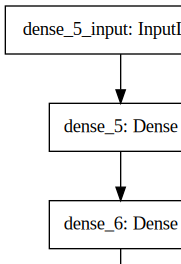

In [0]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#Exercise: Train a Sequential Neural network on CIFAR10 dataset

In [0]:
#import packages
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical


In [0]:
#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#change shape from image to vector
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

170500096/170498071 [==============================] - 6s 0us/step


# Build sequential model 



1.   Sequential model with four layers having 1024,512,512,10 nodes respectively
2.   Input shape = 3072
3.   Activation of first three layers is relu and final is softmax
4.   Compile model using loss='categorical_crossentropy', optimizer='adam' and metrics=['accuracy']
5. Train model



In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
 
history = model.fit(X_train, Y_train,
                        batch_size=128,
                        nb_epoch=10,
                        verbose=1,
                        validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 66us/step - loss: 1.8761 - acc: 0.3178 - val_loss: 1.6952 - val_acc: 0.3881
Epoch 2/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.6528 - acc: 0.4072 - val_loss: 1.5978 - val_acc: 0.4291
Epoch 3/10
50000/50000 [==============================] - 3s 58us/step - loss: 1.5602 - acc: 0.4425 - val_loss: 1.5085 - val_acc: 0.4589
Epoch 4/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.5059 - acc: 0.4625 - val_loss: 1.4726 - val_acc: 0.4766
Epoch 5/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.4528 - acc: 0.4806 - val_loss: 1.4632 - val_acc: 0.4777
Epoch 6/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.4127 - acc: 0.4958 - val_loss: 1.4357 - val_acc: 0.4859
Epoch 7/10
50000/50000 [==============================] - 3s 58us/step - loss: 1.3799 - acc: 0.5062 - val_loss: 1.4282 - val_acc

Double-click <b>here</b> for the solution.

<!--
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
 

# training
history = model.fit(X_train, Y_train,
                        batch_size=128,
                        nb_epoch=10,
                        verbose=1,
                        validation_data=(X_test, Y_test))
-->

# Plot accuracy and loss after model is trained. 

(Caution: Will not work unless previous step is performed)

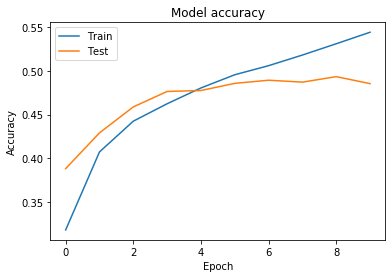

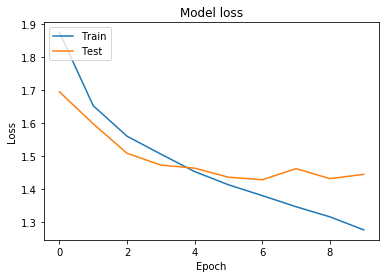

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Improving accuracy on Iris dataset



1.   Find the accuracy of the below model
2.   Improve accuracy by increasing layers, epochs, optimizer or loss metrics



In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam

iris_data = load_iris()
	
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)


# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.01)


model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Epoch 1/200
 - 0s - loss: 2.9132 - acc: 0.3378
Epoch 2/200
 - 0s - loss: 1.6705 - acc: 0.0270
Epoch 3/200
 - 0s - loss: 1.2200 - acc: 0.0068
Epoch 4/200
 - 0s - loss: 1.0613 - acc: 0.2500
Epoch 5/200
 - 0s - loss: 0.9436 - acc: 0.5541
Epoch 6/200
 - 0s - loss: 0.8312 - acc: 0.7365
Epoch 7/200
 - 0s - loss: 0.7599 - acc: 0.8784
Epoch 8/200
 - 0s - loss: 0.7029 - acc: 0.8986
Epoch 9/200
 - 0s - loss: 0.6584 - acc: 0.9054
Epoch 10/200
 - 0s - loss: 0.6174 - acc: 0.7568
Epoch 11/200
 - 0s - loss: 0.5815 - acc: 0.9324
Epoch 12/200
 - 0s - loss: 0.5440 - acc: 0.8581
Epoch 13/200
 - 0s - loss: 0.5117 - acc: 0.8716
Epoch 14/200
 - 0s - loss: 0.4869 - acc: 0.9595
Epoch 15/200
 - 0s - loss: 0.4700 - acc: 0.8581
Epoch 16/200
 - 0s - loss: 0.4363 - acc: 0.9189
Epoch 17/200
 - 0s - loss: 0.4120 - acc: 0.9392
Epoch 18/200
 - 0s - loss: 0.3886 - acc: 0.9324
Epoch 19/200
 - 0s - loss: 0.3736 - acc: 0.9257
Epoch 20/200
 - 0s - loss: 0.3446 - acc: 0.9662
Epoch 21/200
 - 0s - loss: 0.3268 - acc: 0.9797
E

#Thank you for completing this notebook.




<!--
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

-->